# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [100]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing dan machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [101]:
# Memuat dataset ke dalam DataFrame
file_path = '/content/drive/MyDrive/Dataset Clustering/bank_transactions_data.csv'
dataset = pd.read_csv(file_path, delimiter=',')

# Menampilkan informasi dataset
print("Informasi Dataset:")
print(dataset.info())

# Menampilkan 5 baris pertama dataset
print("\n5 Baris Pertama Dataset:")
print(dataset.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Accou

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
file_path = '/content/drive/MyDrive/Dataset Clustering/bank_transactions_data.csv'
dataset = pd.read_csv(file_path, delimiter=',')

# Memastikan dataset terbaca dengan benar
print("Beberapa Baris Pertama Dataset:")
print(dataset.head())

# Informasi dataset
print("\nInformasi Dataset:")
print(dataset.info())

# 1. Memahami Struktur Data
print("\nJumlah Baris dan Kolom:")
print(dataset.shape)
print("\nJenis Data pada Setiap Kolom:")
print(dataset.dtypes)

Beberapa Baris Pertama Dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70         

In [103]:
# 2. Menangani Data yang Hilang
print("\nData yang Hilang pada Setiap Kolom:")
missing_values = dataset.isnull().sum()
print(missing_values)

# Mengisi nilai yang hilang pada kolom numerikal dengan mean
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    if missing_values[col] > 0:
        dataset[col] = dataset[col].fillna(dataset[col].mean())

# Mengisi nilai yang hilang pada kolom kategorikal dengan modus
for col in dataset.select_dtypes(include=['object']).columns:
    if missing_values[col] > 0:
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])


Data yang Hilang pada Setiap Kolom:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64



Statistik Deskriptif:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


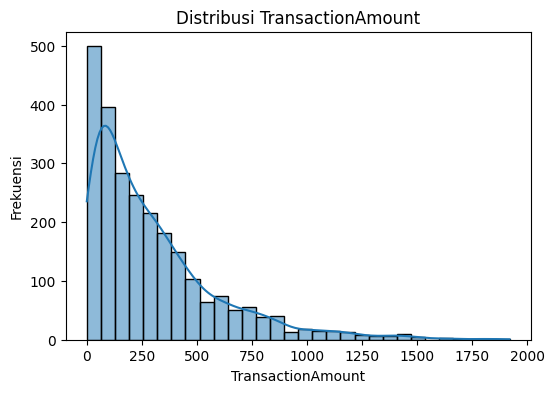

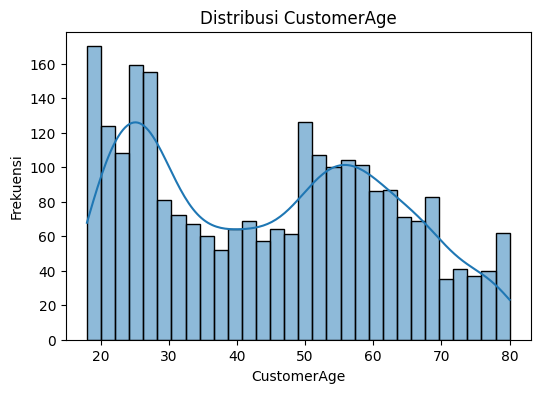

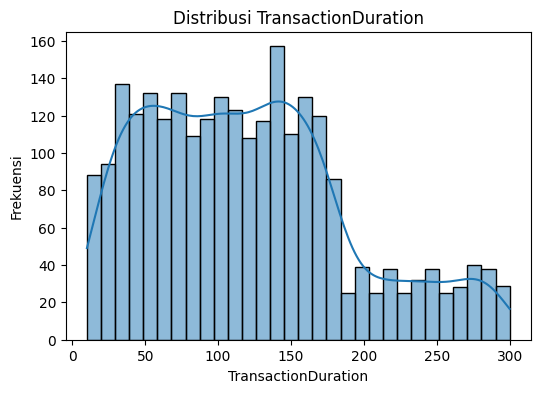

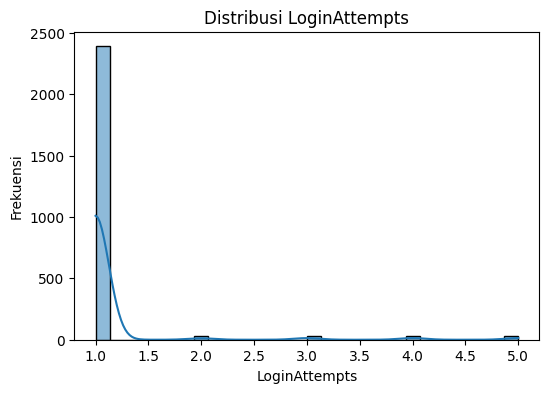

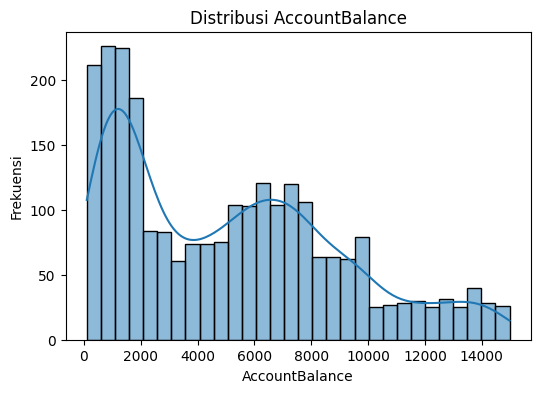

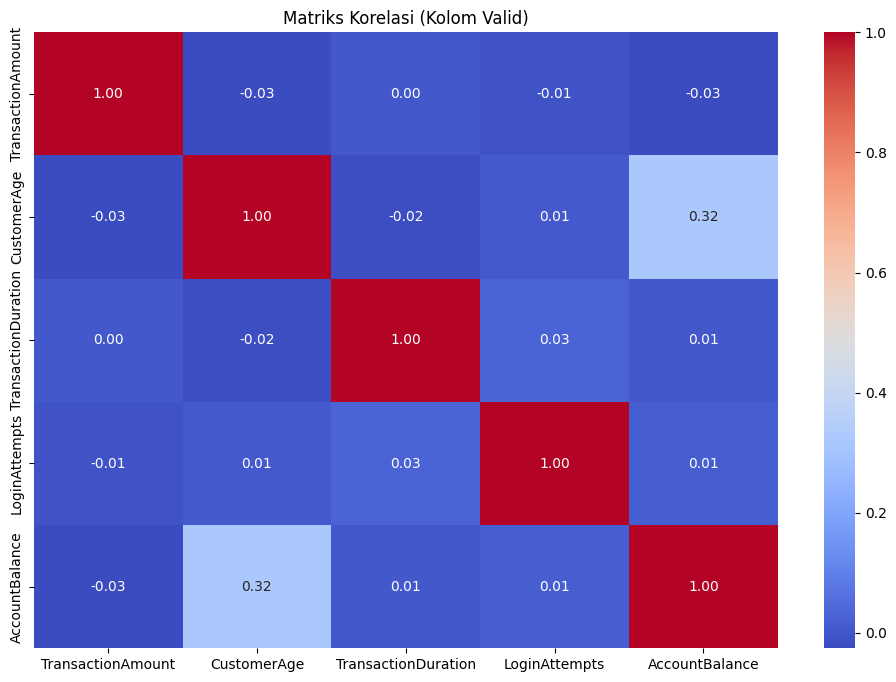

In [104]:
# 3. Analisis Distribusi dan Korelasi
# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(dataset.describe())

# Visualisasi Distribusi Numerikal (Histogram)
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Matriks Korelasi
# Filter kolom numerikal
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Hapus kolom yang seluruh nilainya NaN
valid_numerical_cols = dataset[numerical_cols].dropna(axis=1, how='all').columns

# Hapus kolom dengan variansi nol (tidak ada variasi data)
valid_numerical_cols = [
    col for col in valid_numerical_cols if dataset[col].nunique() > 1
]

if valid_numerical_cols:  # Cek jika ada kolom valid yang tersisa
    # Hitung matriks korelasi hanya pada kolom valid
    correlation_matrix = dataset[valid_numerical_cols].corr()

    # Plot heatmap matriks korelasi
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Matriks Korelasi (Kolom Valid)")
    plt.show()
else:
    print("Tidak ada kolom numerikal valid untuk menghitung korelasi.")


Kolom `TransactionID` memiliki terlalu banyak kategori (2512). Menampilkan hanya 20 teratas.


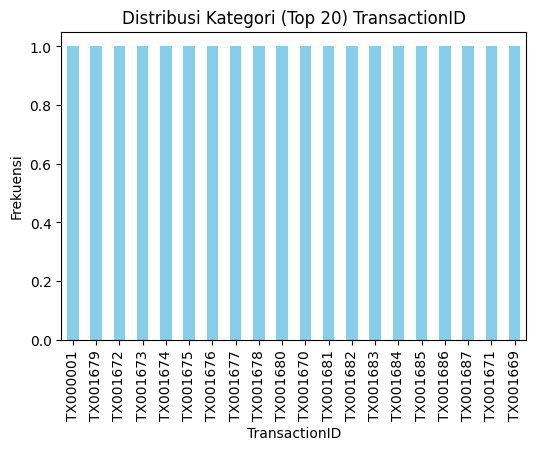


Kolom `AccountID` memiliki terlalu banyak kategori (495). Menampilkan hanya 20 teratas.


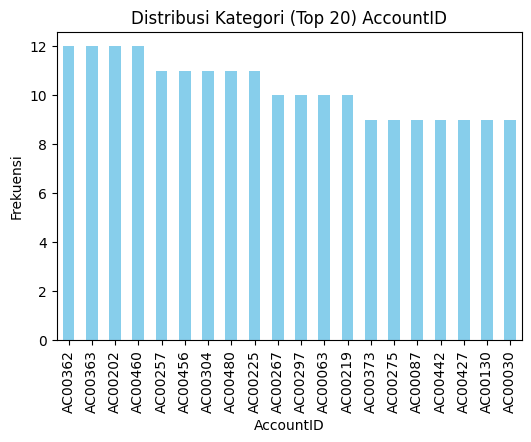


Kolom `TransactionDate` memiliki terlalu banyak kategori (2512). Menampilkan hanya 20 teratas.


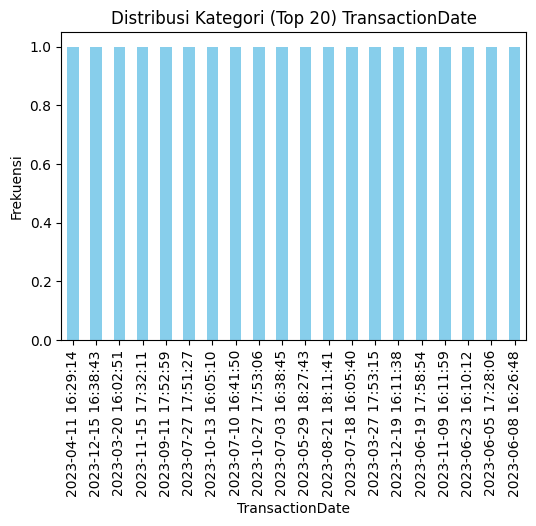

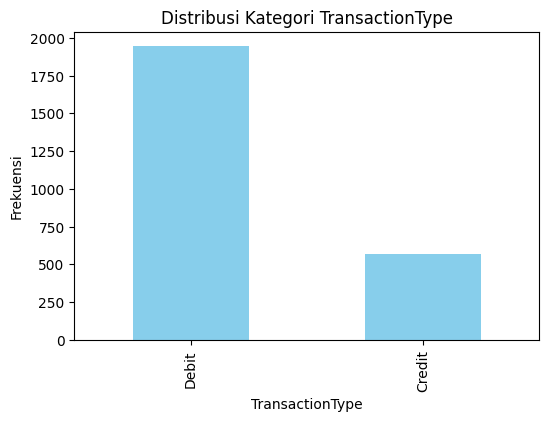


Kolom `Location` memiliki terlalu banyak kategori (43). Menampilkan hanya 20 teratas.


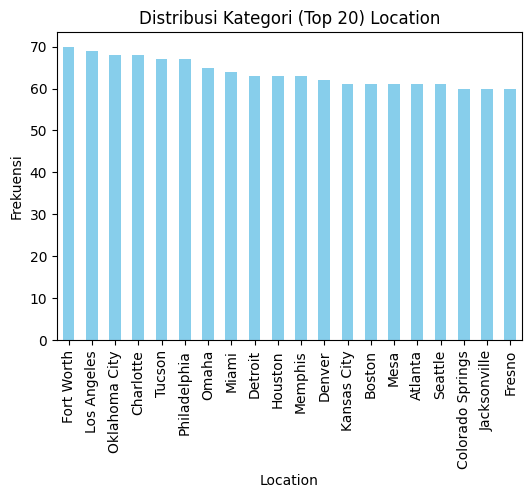


Kolom `DeviceID` memiliki terlalu banyak kategori (681). Menampilkan hanya 20 teratas.


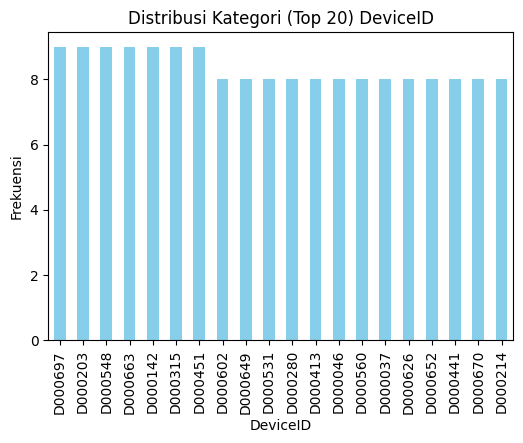


Kolom `IP Address` memiliki terlalu banyak kategori (592). Menampilkan hanya 20 teratas.


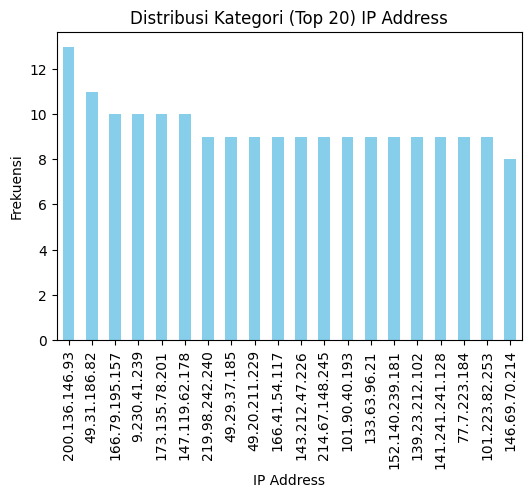


Kolom `MerchantID` memiliki terlalu banyak kategori (100). Menampilkan hanya 20 teratas.


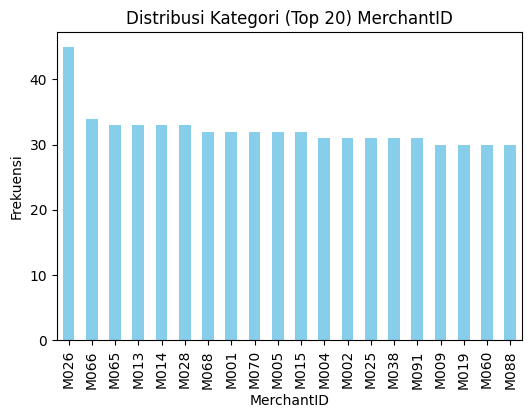

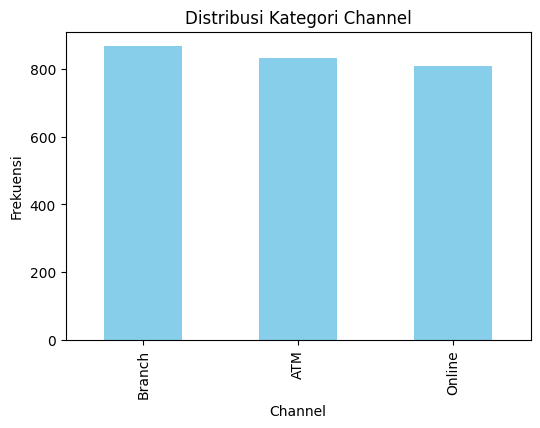

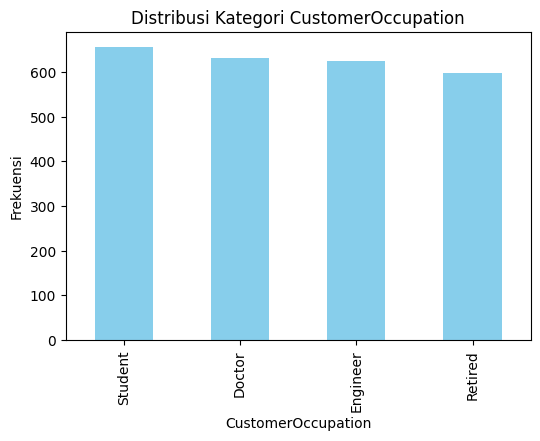


Kolom `PreviousTransactionDate` memiliki terlalu banyak kategori (360). Menampilkan hanya 20 teratas.


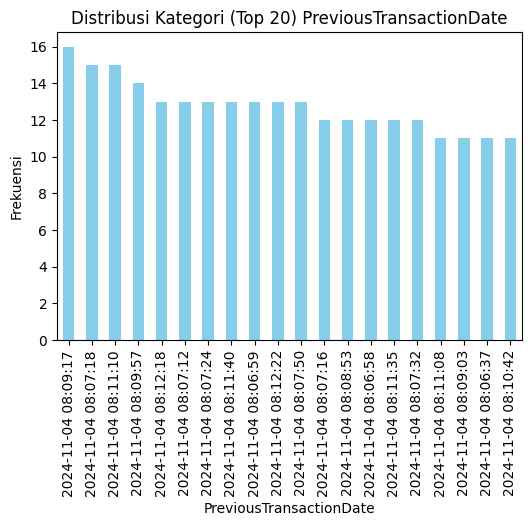

In [105]:
# 4. Visualisasi Data Kategorikal
max_unique_values = 20  # Maksimal jumlah kategori yang divisualisasikan
categorical_cols = dataset.select_dtypes(include=['object']).columns

for col in categorical_cols:
    unique_values = dataset[col].nunique()
    if unique_values > max_unique_values:
        print(f"\nKolom `{col}` memiliki terlalu banyak kategori ({unique_values}). Menampilkan hanya {max_unique_values} teratas.")
        top_categories = dataset[col].value_counts().nlargest(max_unique_values)
        plt.figure(figsize=(6, 4))
        top_categories.plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori (Top {max_unique_values}) {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()
    else:
        plt.figure(figsize=(6, 4))
        dataset[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"Distribusi Kategori {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")
        plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [106]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# 1. Menghapus atau Menangani Data Kosong (Sudah ditangani sebelumnya)
print("Jumlah Nilai Kosong Setelah Penanganan:")
print(dataset.isnull().sum())

Jumlah Nilai Kosong Setelah Penanganan:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [107]:
# 2. Menghapus Data Duplikasi
print("\nJumlah Baris Sebelum Menghapus Duplikasi:", dataset.shape[0])
dataset.drop_duplicates(inplace=True)
print("Jumlah Baris Setelah Menghapus Duplikasi:", dataset.shape[0])


Jumlah Baris Sebelum Menghapus Duplikasi: 2512
Jumlah Baris Setelah Menghapus Duplikasi: 2512


In [108]:
# 3. Normalisasi atau Standarisasi Fitur
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])
print("\nData Numerikal Setelah Normalisasi/Standarisasi:")
print(dataset[numerical_cols].head())


Data Numerikal Setelah Normalisasi/Standarisasi:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.971275     1.423718            -0.552443      -0.206794   
1           0.269440     1.311287             0.305314      -0.206794   
2          -0.586882    -1.443277            -0.909842      -0.206794   
3          -0.387456    -1.049768            -1.353017      -0.206794   
4          -0.973468    -1.049768             1.120184      -0.206794   

   AccountBalance  
0       -0.000537  
1        2.216472  
2       -1.023534  
3        0.885797  
4        0.593589  


In [109]:
# 4. Deteksi dan Penanganan Outlier
# Menggunakan metode IQR (Interquartile Range)
Q1 = dataset[numerical_cols].quantile(0.25)
Q3 = dataset[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((dataset[numerical_cols] < (Q1 - 1.5 * IQR)) | (dataset[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nJumlah Outlier Teridentifikasi:", outliers.sum())
# Menghapus outlier jika diperlukan
dataset = dataset.loc[~outliers]
print("Jumlah Baris Setelah Menghapus Outlier:", dataset.shape[0])


Jumlah Outlier Teridentifikasi: 230
Jumlah Baris Setelah Menghapus Outlier: 2282


In [110]:
# 5. Encoding Data Kategorikal
categorical_cols = dataset.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dataset.loc[:, col] = le.fit_transform(dataset[col])
    label_encoders[col] = le  # Simpan encoder untuk interpretasi nanti
print("\nData Kategorikal Setelah Encoding:")
print(dataset[categorical_cols].head())


Data Kategorikal Setelah Encoding:
  TransactionID AccountID TransactionDate TransactionType Location DeviceID  \
0             0       126             620               1       36      364   
1             1       449            1088               1       15       50   
2             2        18            1166               1       23      229   
3             3        68             746               1       33      182   
4             4       405            1786               0        1      297   

  IP Address MerchantID Channel CustomerOccupation PreviousTransactionDate  
0        185         14       0                  0                     105  
1         81         51       0                  0                     192  
2        342          8       2                  3                      41  
3        299          1       2                  3                     163  
4        499         90       2                  3                      16  


In [111]:
# 6. Binning (Pengelompokan Data)
# Contoh Binning pada kolom numerikal tertentu (misal, Age setelah normalisasi)
if 'Year_Birth' in dataset.columns:
    dataset.loc[:, 'Age_Group'] = pd.cut(dataset['Year_Birth'], bins=5, labels=['Young', 'Adult', 'Middle-Aged', 'Senior', 'Elderly'])
    print("\nDistribusi Age Group:")
    print(dataset['Age_Group'].value_counts())

# Menampilkan dataset hasil preprocessing
print("\nDataset Setelah Preprocessing:")
print(dataset.head())


Dataset Setelah Preprocessing:
  TransactionID AccountID  TransactionAmount TransactionDate TransactionType  \
0             0       126          -0.971275             620               1   
1             1       449           0.269440            1088               1   
2             2        18          -0.586882            1166               1   
3             3        68          -0.387456             746               1   
4             4       405          -0.973468            1786               0   

  Location DeviceID IP Address MerchantID Channel  CustomerAge  \
0       36      364        185         14       0     1.423718   
1       15       50         81         51       0     1.311287   
2       23      229        342          8       2    -1.443277   
3       33      182        299          1       2    -1.049768   
4        1      297        499         90       2    -1.049768   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [112]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

# Memilih fitur numerik dan kategorikal yang relevan
numerical_features = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"] # Fitur numerik
categorical_features = ["TransactionType"]  # Fitur kategorikal

# Memisahkan data numerik dan kategorikal
df_numerical = dataset[numerical_features]
df_categorical = dataset[categorical_features]

# Normalisasi fitur numerik
scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)

# One-Hot Encoding untuk fitur kategorikal
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_categorical_encoded = encoder.fit_transform(df_categorical)

# Gabungkan fitur numerik dan kategorikal
df_final = pd.concat([pd.DataFrame(df_numerical_scaled), pd.DataFrame(df_categorical_encoded)], axis=1)

# Membangun model clustering dengan K-Means (Memilih algoritma yang sesuai)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dataset["Cluster"] = kmeans.fit_predict(df_final)

# Menampilkan jumlah data dalam setiap klaster
print(dataset["Cluster"].value_counts())

Cluster
1    1093
0     721
2     468
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Jumlah klaster: 2, Silhouette Score: 0.2295341269907906 - Tidak Disimpan
Jumlah klaster: 3, Silhouette Score: 0.22978267686032589 - Tidak Disimpan
Jumlah klaster: 4, Silhouette Score: 0.22543474729040133 - Tidak Disimpan
Jumlah klaster: 5, Silhouette Score: 0.23228375114922717 - Tidak Disimpan
Jumlah klaster: 6, Silhouette Score: 0.22846913064829602 - Tidak Disimpan
Jumlah klaster: 7, Silhouette Score: 0.2149798525534342 - Tidak Disimpan
Jumlah klaster: 8, Silhouette Score: 0.20989761092927156 - Tidak Disimpan
Jumlah klaster: 9, Silhouette Score: 0.2131115672827431 - Tidak Disimpan


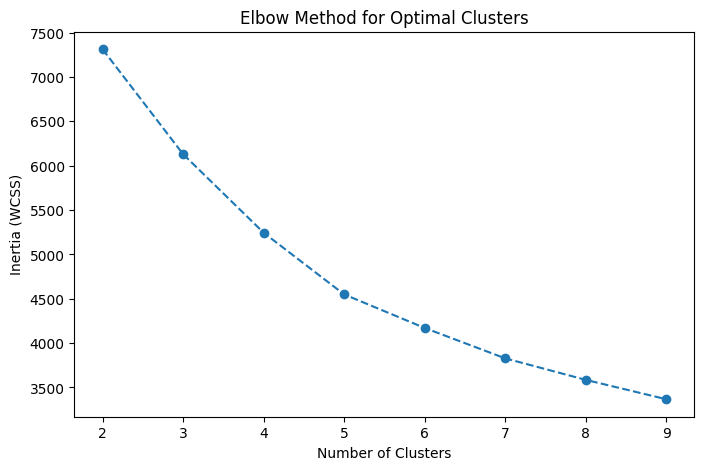

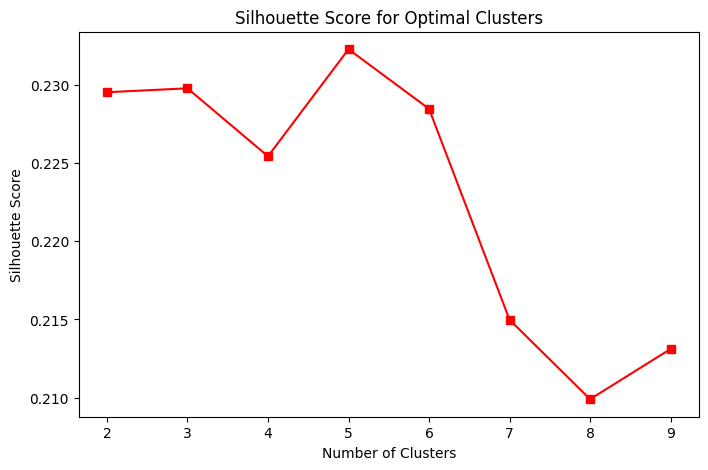


Jumlah cluster optimal berdasarkan Silhouette Score: 5


In [113]:
## Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 10)  # Uji jumlah klaster dari 2 hingga 10

valid_cluster_labels = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_final)

    # Simpan inertia (WCSS) untuk Elbow Method
    inertia.append(kmeans.inertia_)

    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(df_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Simpan cluster label jika Silhouette Score >= 0.55
    if silhouette_avg >= 0.55:
        valid_cluster_labels.append(cluster_labels)
        print(f"Jumlah klaster: {k}, Silhouette Score: {silhouette_avg} - Disimpan")
    else:
        print(f"Jumlah klaster: {k}, Silhouette Score: {silhouette_avg} - Tidak Disimpan")

# Visualisasi Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.show()

# Pilih jumlah cluster optimal berdasarkan Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

In [114]:
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")

Silhouette Score Tanpa Feature Selection: 0.2295341269907906


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

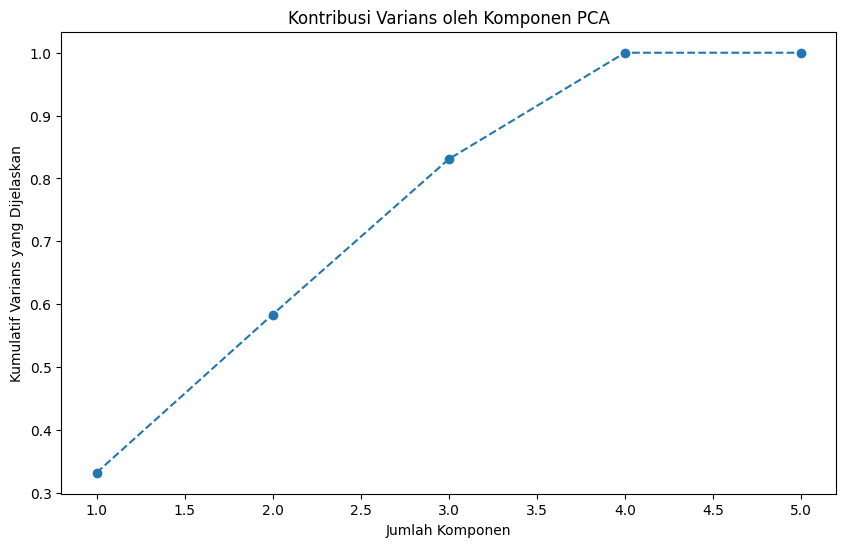

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df_numerical contains the numerical features for clustering
clustering_data = df_numerical

# Standarisasi data sebelum PCA
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Fit PCA pada data yang sudah distandarisasi
pca = PCA(n_components=len(numerical_cols))  # Pastikan menggunakan jumlah fitur numerik
pca_data = pca.fit_transform(clustering_data_scaled)

# Plot kontribusi varians setiap komponen
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(numerical_cols) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Kontribusi Varians oleh Komponen PCA')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.show()

In [116]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menentukan jumlah fitur optimal berdasarkan 50% varians yang dijelaskan
n_components_optimal = sum(pca.explained_variance_ratio_.cumsum() <= 0.50)
print(f"\nJumlah fitur optimal berdasarkan PCA: {n_components_optimal}")

# Transformasi data berdasarkan fitur utama
reduced_data = PCA(n_components=n_components_optimal).fit_transform(clustering_data_scaled)

# Model clustering baru dengan data hasil reduksi dimensi
kmeans_reduced = KMeans(n_clusters=3, random_state=42)
cluster_labels_reduced = kmeans_reduced.fit_predict(reduced_data)

# Hitung Silhouette Score untuk data hasil feature selection
silhouette_score_reduced = silhouette_score(reduced_data, cluster_labels_reduced)
print(f"\nSilhouette Score dengan Feature Selection: {silhouette_score_reduced}")


Jumlah fitur optimal berdasarkan PCA: 1

Silhouette Score dengan Feature Selection: 0.6139009548615805


In [117]:
# Bandingkan dengan Silhouette Score sebelumnya
silhouette_score_original = silhouette_scores[0]  # Score awal dengan seluruh fitur
print(f"Silhouette Score Tanpa Feature Selection: {silhouette_score_original}")

# Jika Silhouette Score >= 0.55, simpan label klaster
if silhouette_score_reduced >= 0.55:
    valid_cluster_labels = cluster_labels_reduced
    print("Silhouette Score", silhouette_score_reduced, "disimpan")

    # Menyimpan hasil cluster ke dalam dataset
    dataset['Cluster_After_FS'] = valid_cluster_labels
    print("Cluster labels disimpan ke dalam dataset.")

else:
    valid_cluster_labels = None
    print("Silhouette Score < 0.55 tidak disimpan.")

print(valid_cluster_labels)

Silhouette Score Tanpa Feature Selection: 0.2295341269907906
Silhouette Score 0.6139009548615805 disimpan
Cluster labels disimpan ke dalam dataset.
[0 0 1 ... 2 1 1]


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [118]:
print("Kolom dalam Dataset:")
print(dataset.columns)

Kolom dalam Dataset:
Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'Cluster',
       'Cluster_After_FS'],
      dtype='object')


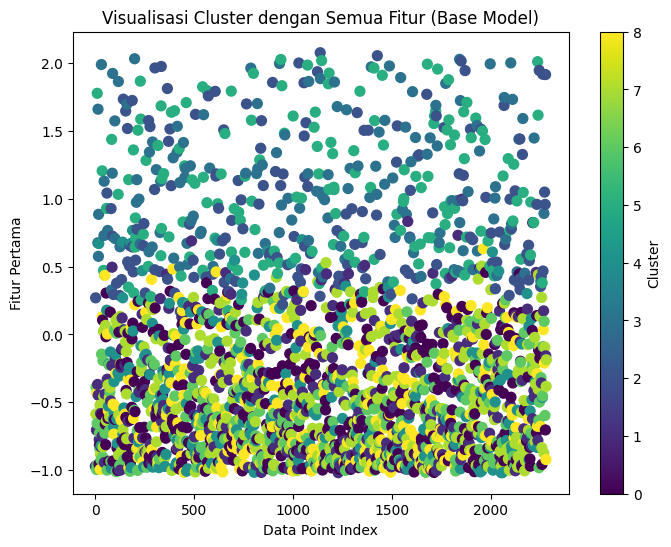

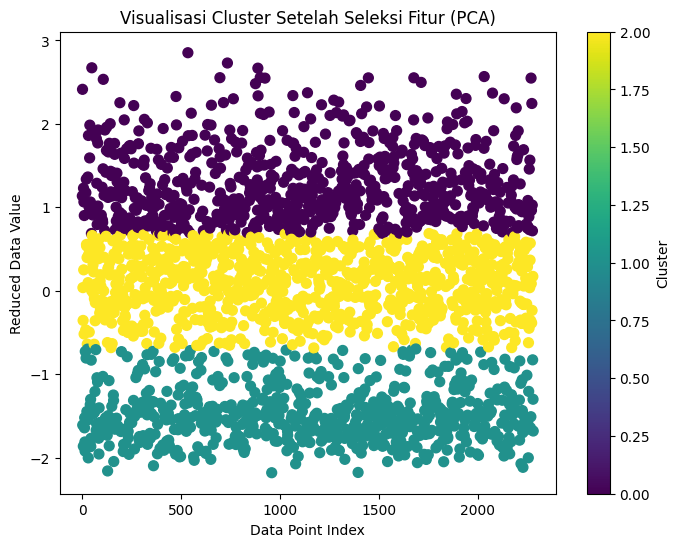

In [119]:
# Visualisasi cluster dengan semua fitur (Base Model)
plt.figure(figsize=(8, 6))
plt.scatter(range(len(clustering_data)), clustering_data.iloc[:, 0], c=cluster_labels, cmap='viridis', s=50)
plt.title(f'Visualisasi Cluster dengan Semua Fitur (Base Model)')
plt.colorbar(label='Cluster')
plt.xlabel('Data Point Index')
plt.ylabel('Fitur Pertama')
plt.show()

# Visualisasi cluster setelah seleksi fitur (PCA)
print("\n")
plt.figure(figsize=(8, 6))
plt.scatter(range(len(reduced_data)), reduced_data[:, 0], c=cluster_labels_reduced, cmap='viridis', s=50)
plt.title(f'Visualisasi Cluster Setelah Seleksi Fitur (PCA)')
plt.colorbar(label='Cluster')
plt.xlabel('Data Point Index')
plt.ylabel('Reduced Data Value')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

Data setelah inverse transform:
  TransactionID AccountID  TransactionAmount TransactionDate TransactionType  \
0             0       126          -0.868688             620           Debit   
1             1       449           0.056875            1088           Debit   
2             2        18          -0.581933            1166           Debit   
3             3        68          -0.433163             746           Debit   
4             4       405          -0.870323            1786          Credit   

  Location DeviceID IP Address MerchantID Channel  CustomerAge  \
0       36      364        185         14       0     1.417762   
1       15       50         81         51       0     1.305840   
2       23      229        342          8       2    -1.436246   
3       33      182        299          1       2    -1.044520   
4        1      297        499         90       2    -1.044520   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             

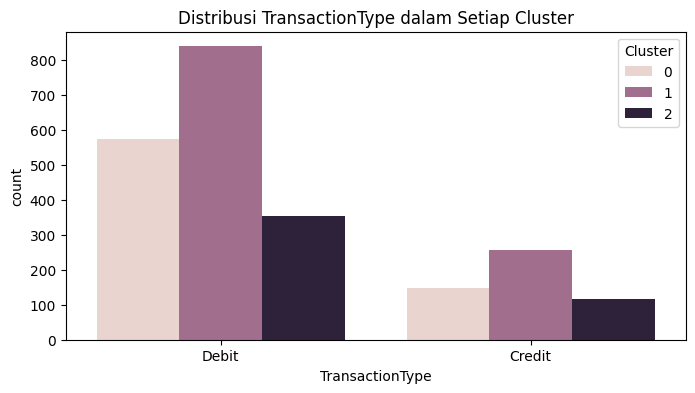


Statistik Deskriptif per Cluster:
        TransactionAmount                                                    \
                    count      mean       std       min       25%       50%   
Cluster                                                                       
0                   721.0 -0.437716  0.343128 -0.904033 -0.737910 -0.492968   
1                  1093.0 -0.506278  0.295009 -0.903880 -0.759302 -0.571429   
2                   468.0  0.629728  0.380286 -0.058977  0.302457  0.595626   

                            CustomerAge            ... LoginAttempts  \
              75%       max       count      mean  ...           75%   
Cluster                                            ...                 
0       -0.193511  0.515785       721.0 -0.967680  ...     -0.413587   
1       -0.285773  0.363028      1093.0  0.635896  ...     -0.413587   
2        0.939815  1.403625       468.0  0.010488  ...     -0.413587   

                  AccountBalance                         

In [125]:
# Menambahkan label cluster ke dataset yang telah dinormalisasi
df_normalized = dataset.copy()
df_normalized['Cluster'] = dataset['Cluster']

# Melakukan inverse transform pada fitur kategorikal yang telah diencode
for col in categorical_features:
    # Ensure the column is of numeric type before inverse transform
    df_normalized[col] = pd.to_numeric(df_normalized[col], errors='coerce') # Convert to numeric, handle errors
    df_normalized[col] = df_normalized[col].astype(int) # Convert to int
    df_normalized[col] = label_encoders[col].inverse_transform(df_normalized[col])

# Mengembalikan fitur numerik ke skala aslinya
df_original = dataset.copy()
df_original[numerical_features] = scaler.inverse_transform(df_normalized[numerical_features])
df_original[categorical_features] = df_normalized[categorical_features]
df_original['Cluster'] = df_normalized['Cluster']

# Menampilkan beberapa baris hasil inverse transform
print("Data setelah inverse transform:")
print(df_original.head())

# Analisis hasil clustering berdasarkan distribusi kategori dalam setiap klaster
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_original, x=col, hue='Cluster')
    plt.title(f'Distribusi {col} dalam Setiap Cluster')
    plt.show()

# Analisis statistik numerik per cluster
print("\nStatistik Deskriptif per Cluster:")
print(df_original.groupby('Cluster')[numerical_features].describe())

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [122]:
# Melakukan inverse transform untuk fitur numerik yang telah dinormalisasi
df_normalized[numerical_features] = scaler.inverse_transform(df_normalized[numerical_features])

# Memasukkan kembali ke dataset asli
df_original[numerical_features] = df_normalized[numerical_features]

# Menampilkan hasil setelah inverse transform
print("\nData setelah inverse transform untuk fitur numerik:")
print(df_original[numerical_features].head())


Data setelah inverse transform untuk fitur numerik:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.868688     1.417762            -0.561148      -0.413587   
1           0.056875     1.305840             0.295242      -0.413587   
2          -0.581933    -1.436246            -0.917977      -0.413587   
3          -0.433163    -1.044520            -1.360445      -0.413587   
4          -0.870323    -1.044520             1.108813      -0.413587   

   AccountBalance  
0        0.000811  
1        2.206680  
2       -1.017046  
3        0.882692  
4        0.591952  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

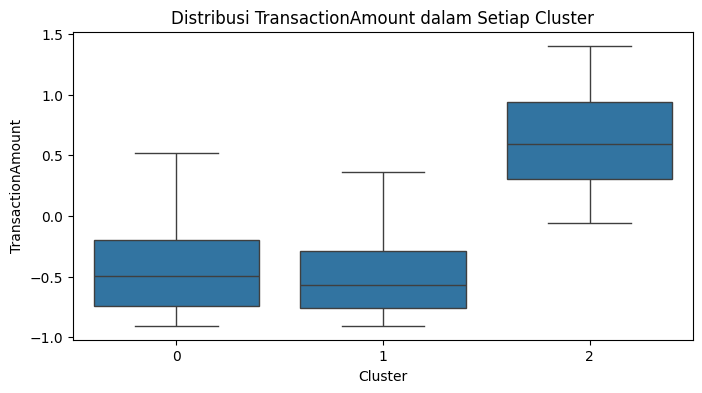

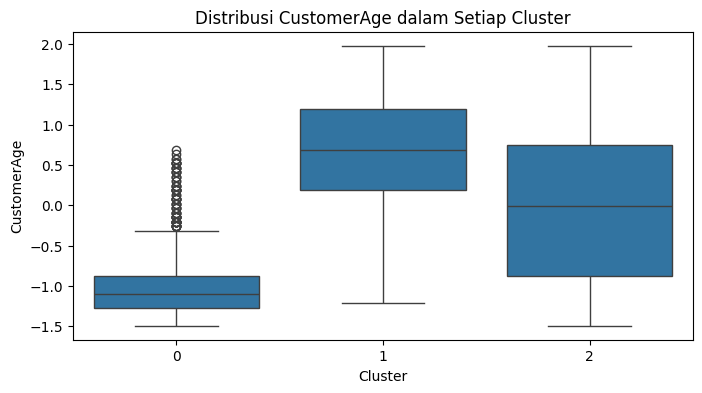

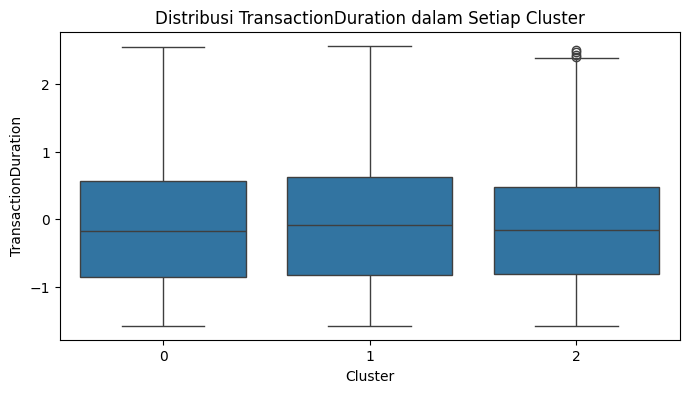

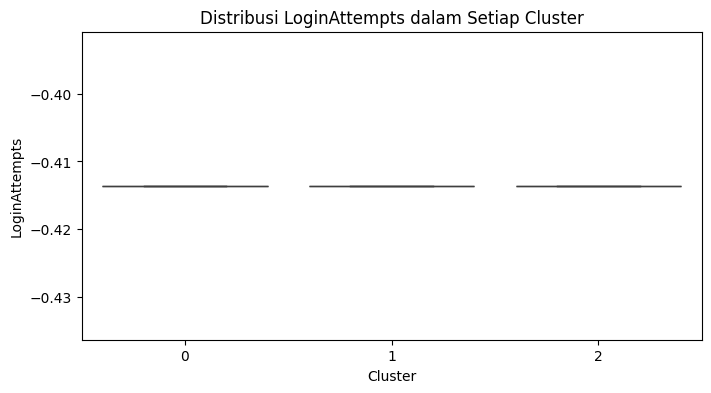

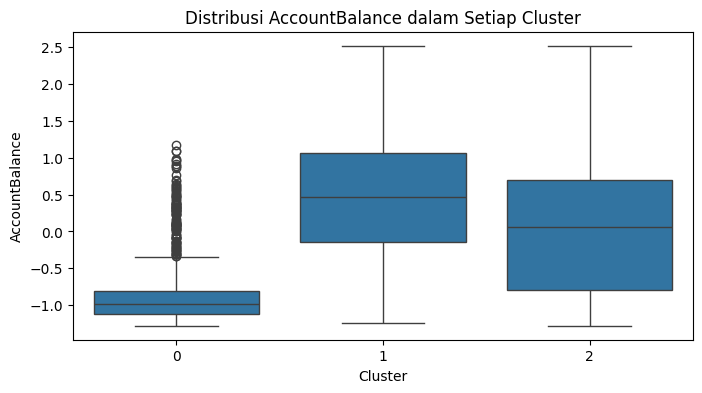

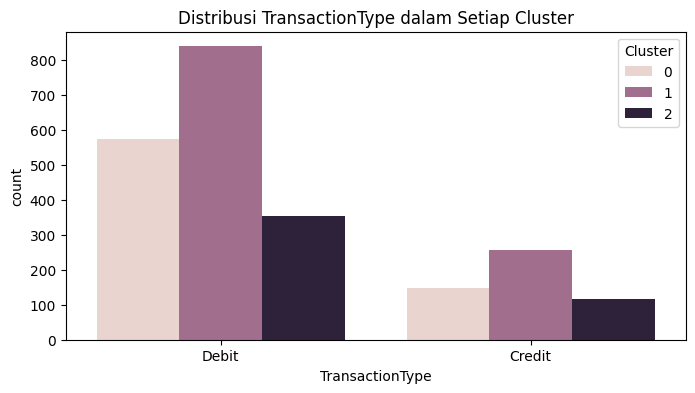


Statistik Deskriptif per Cluster:
        TransactionAmount                                                    \
                    count      mean       std       min       25%       50%   
Cluster                                                                       
0                   721.0 -0.437716  0.343128 -0.904033 -0.737910 -0.492968   
1                  1093.0 -0.506278  0.295009 -0.903880 -0.759302 -0.571429   
2                   468.0  0.629728  0.380286 -0.058977  0.302457  0.595626   

                            CustomerAge            ... LoginAttempts  \
              75%       max       count      mean  ...           75%   
Cluster                                            ...                 
0       -0.193511  0.515785       721.0 -0.967680  ...     -0.413587   
1       -0.285773  0.363028      1093.0  0.635896  ...     -0.413587   
2        0.939815  1.403625       468.0  0.010488  ...     -0.413587   

                  AccountBalance                         

In [126]:
# Analisis distribusi fitur numerik dalam setiap cluster
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_original, x='Cluster', y=col)
    plt.title(f'Distribusi {col} dalam Setiap Cluster')
    plt.show()

# Analisis distribusi fitur kategorikal dalam setiap cluster
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_original, x=col, hue='Cluster')
    plt.title(f'Distribusi {col} dalam Setiap Cluster')
    plt.show()

# Statistik deskriptif per cluster
print("\nStatistik Deskriptif per Cluster:")
print(df_original.groupby('Cluster')[numerical_features].describe())

# Interpretasi hasil clustering dengan format yang diminta
print("\n📌 Interpretasi Hasil Clustering:")
for cluster in df_original['Cluster'].unique():
    cluster_data = df_original[df_original['Cluster'] == cluster]

    print(f"\n🔹 **Cluster {cluster}:**")
    for col in numerical_features:
        mean_val = cluster_data[col].mean()
        min_val = cluster_data[col].min()
        max_val = cluster_data[col].max()
        print(f"  - {col}: Rata-rata {mean_val:.2f}, dengan batas minimum {min_val:.2f} dan maksimum {max_val:.2f}")

    for col in categorical_features:
        mode_val = cluster_data[col].mode()[0]  # Modus (nilai yang paling sering muncul)
        mode_percentage = (cluster_data[col].value_counts(normalize=True).max()) * 100
        print(f"  - {col}: Kategori yang paling dominan adalah '{mode_val}' dengan persentase {mode_percentage:.2f}%")

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Ukuran Cluster:** 721 data
- **Rata-rata Nilai Fitur Numerik:**
    1. **Transaction Amount:** -0.438
    2. **Customer Age:** -0.968
    3. **Transaction Duration:** -0.033
    4. **Login Attempts:** -0.414
    5. **Account Balance:** -0.813
- **Distribusi Transaction Type:**
    1. **Debit:** 79.47%
    2. **Credit:** 20.53%
- **Analisis:** Cluster ini terdiri dari pelanggan yang lebih muda dengan saldo akun yang jauh lebih rendah dibandingkan dengan cluster lainnya. Jumlah transaksi mereka juga lebih kecil, yang dapat mengindikasikan bahwa mereka memiliki keterbatasan daya beli atau cenderung lebih hemat dalam pengeluaran mereka.

## Cluster 1:
- **Ukuran Cluster:** 1093 data
- **Rata-rata Nilai Fitur Numerik:**
  1. **Transaction Amount:** -0.506
  2. **Customer Age:** 0.636
  3. **Transaction Duration:** 0.011
  4. **Login Attempts:** -0.414
  5. **Account Balance:** 0.505
- **Distribusi Transaction Type:**
  1. **Debit:** 76.67%
  2. **Credit:** 23.33%
- **Analisis:** Cluster ini mencakup pelanggan dengan saldo akun yang lebih tinggi dan usia lebih tua dibandingkan dengan cluster lainnya. Namun, mereka memiliki jumlah transaksi yang lebih rendah. Hal ini dapat menunjukkan bahwa pelanggan dalam cluster ini lebih berhati-hati dalam pengeluaran atau mungkin lebih memilih metode transaksi lain seperti investasi atau tabungan.

## Cluster 2:
- **Ukuran Cluster:** 468 data
- **Rata-rata Nilai Fitur Numerik:**
  1. **Transaction Amount:** 0.630
  2. **Customer Age:** 0.010
  3. **Transaction Duration:** -0.067
  4. **Login Attempts:** -0.414
  5. **Account Balance:** 0.088
- **Distribusi Transaction Type:**
  1. **Debit:** 75.43%
  2. **Credit:** 24.57%
- **Analisis:** Cluster ini mencakup pelanggan yang memiliki jumlah transaksi yang lebih tinggi dibandingkan dengan cluster lainnya, namun dengan saldo akun yang tidak terlalu besar. Mereka mungkin merupakan kelompok dengan daya beli tinggi yang aktif dalam bertransaksi tetapi tidak menyimpan saldo besar di rekening mereka.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [124]:
# Simpan dataset ke dalam file CSV
output_file = 'hasil_clustering.csv'
dataset.to_csv(output_file, index=False)
print(f"Dataset telah berhasil disimpan ke file: {output_file}")

Dataset telah berhasil disimpan ke file: hasil_clustering.csv
